#Multiclass Classification

##Imporing the understanding the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-29 06:58:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   144MB/s    in 3.4s    

2022-01-29 06:58:54 (144 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f'There are {len(dirnames)} directories with {len(filenames)} images in the {dirpath}.')

There are 2 directories with 0 images in the 10_food_classes_all_data.
There are 10 directories with 0 images in the 10_food_classes_all_data/train.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/hamburger.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/fried_rice.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/sushi.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/pizza.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/chicken_curry.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/ice_cream.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/ramen.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories with 750 images in the 10_food_classes_all_data/train/steak.
There are 0 directories with 750 images in the 10_food_c

Lets takes the class names...

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


These are the 10 different class name of given data

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  
  return img


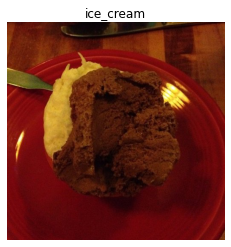

In [6]:
img = view_random_image(target_dir = train_dir, target_class="ice_cream")

## Preprocessing the data

In [9]:
print(train_dir)
print(test_dir)

10_food_classes_all_data/train/
10_food_classes_all_data/test/


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [26]:
#Building a neural_network
model = Sequential([
  Conv2D(filters= 10,kernel_size=3,activation ="relu",input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

#Model Compilation

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=train_data,
                    validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 69s 293ms/step - loss: 2.1569 - accuracy: 0.2025 - val_loss: 1.8993 - val_accuracy: 0.3616
Epoch 2/10
235/235 [==============================] - 55s 232ms/step - loss: 1.8565 - accuracy: 0.3584 - val_loss: 1.6105 - val_accuracy: 0.4889
Epoch 3/10
235/235 [==============================] - 55s 235ms/step - loss: 1.6055 - accuracy: 0.4587 - val_loss: 1.3315 - val_accuracy: 0.5759
Epoch 4/10
235/235 [==============================] - 55s 233ms/step - loss: 1.3417 - accuracy: 0.5520 - val_loss: 1.0967 - val_accuracy: 0.6559
Epoch 5/10
235/235 [==============================] - 62s 265ms/step - loss: 1.0948 - accuracy: 0.6384 - val_loss: 0.7439 - val_accuracy: 0.7836
Epoch 6/10
235/235 [==============================] - 83s 352ms/step - loss: 0.8314 - accuracy: 0.7296 - val_loss: 0.5349 - val_accuracy: 0.8616
Epoch 7/10
235/235 [==============================] - 83s 354ms/step - loss: 0.5784 - accuracy: 0.8107 - val_loss: 0.3175 - val_ac

In [27]:
def plot_loss_curves(history):
  "Return seperate loss curve for train and test data"

  loss = history.history["loss"]
  accuracy = history.history["accuracy"]

  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plotting Loss Curve
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("Loss_curve")
  plt.legend()

  #Plotting Accuracy_curve
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy_curve")
  plt.legend();

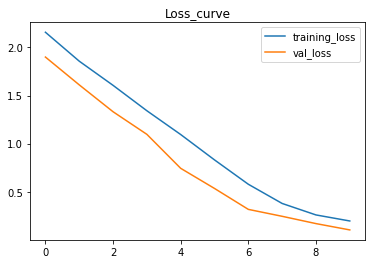

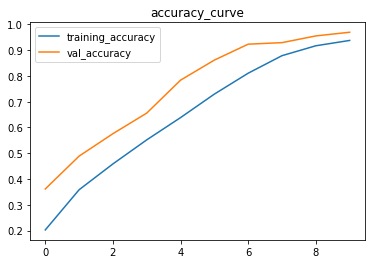

In [28]:
plot_loss_curves(history)

In [29]:
def load_and_prep_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

In [31]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

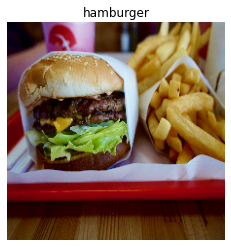

In [33]:
#Model_prediction
img = load_and_prep_image("03-hamburger.jpeg")
pred = model.predict(tf.expand_dims(img, axis=0))
pred_class = class_name[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

I just to increased the epoch which help the model to understand and perform better.. Next we are going to make this process simpler with Transfer learing..